# CSCI 3022 Classification Project - Heart Disease Prediction
## - Brian Solar

***

## Introduction

For our class, CSCI 3022 - Introduction to Data Science Algorithms, we are tasked with going through a machine-learning pipeline as our final project. We have the choice of selecting a classification and/or regression problem, in which I chose classification. In all, it entails: 

1. Identify a multivariate analysis problem of interest  
2. Selecting data source(s)
3. Preprocess data (cleaning, transforming if necessary, etc.)
4. Perform regression or classification 

The following notebook walks through this process, for the selected problem of heart disease prediction.

***

## Table of Contents

1. [Heart Disease](#heart)
    * [Introduction](#idenintro)
    * [Data Source](#datasource)
    * [Data Description](#datadescr)
    * [Goals](#goals)
3. [Exploratory Data Analysis](#eda) (In Progress)
    * [Quick Look](#quicklook)
    * [Preprocessing](#preprocessing)
    * [Variable Exploration](#varexp)
4. [Classification](#classification) (In Progress)

***

<a id='heart'></a>
## Heart Disease

<a id='idenintro'></a>
### Introduction
It is probably known to most that heart disease is the number 1 killer in the United States, and also the [world](https://www.heart.org/-/media/data-import/downloadables/heart-disease-and-stroke-statistics-2018---at-a-glance-ucm_498848.pdf). There is also an effort to [detect heart disease early](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124), so that the necessary lifestyle changes and medical treatments can be made. With the widespread use of machine learning and other statistical tools in the world of [healthcare](https://www.nature.com/articles/s41563-019-0360-1), predicting heart disease with machine learning seems like an obvious task, and in fact, has already been [attempted](https://academic.oup.com/eurheartj/article-abstract/40/24/1975/5060564?redirectedFrom=fulltext). Needless to say, given the complexity of our human body which certaintly leaves heart disease dependent on multiple variables, and how significant early prediction may be, I've chosen this as my multivariate analysis problem to be tackled with classification.

<a id='datasource'></a>
### Data Source

I originally found my dataset on [kaggle](https://www.kaggle.com/johnsmith88/heart-disease-dataset), and discovered it was actually taken from the popular UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease). This dataset consists of 4 databases (as shown in the UCI link) from the following locations:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Interestingly, prior research has only used the database from Cleveland (in fact, there is a very popular Kaggle challenge which uses the Cleveland dataset [here](https://www.kaggle.com/ronitf/heart-disease-uci), which I have drawn some inspiration from). The dataset I will be using will make use of all 4 databases.

<a id='datadescr'></a>
### Data Description
Each database contains measurements from patients after being subjected to [angiography](https://www.mayoclinic.org/tests-procedures/coronary-angiogram/about/pac-20384904), after what appears to be clinically induced exercise. Although each database has 76 variables, only 14 of them have been used in existing literature. The following are the 14 variables with their descriptions:

1. __age__ : Age in years
2. __sex__: Male (1) or Female (0) 
3. __cp__: Chest pain type (angina is another name for chest pain)
    * 0: Typical Angina
    * 1: Atypical Angina 
    * 2: Non-Anginal Pain
    * 3: Asymptomatic 
4. __trestbps__: Resting blood pressure (mmHg)
5. __chol__: Serum cholesterol (mg/dl)
6. __fbs__: Fasting blood sugar > 120 mg/dl
    * (1) True
    * (0) False
7. __restecg__: Resting electrocardiographic results
    * (0) Normal
    * (1) Having ST-T wave abnormality 
    * (2) Showing probable or definite left ventricular hypertrophy by Estes' criteria
8. __thalach__: Maximum heart rate achieved (bpm)
9. __exang__: Exercise induced angina
    * (1) True
    * (0) False
10. __oldpeak__: ST depression induced by exercise relative to rest (real number)
11. __slope__: Slope of the peak exercise ST segment 
    * (0) Upsloping 
    * (1) Flat 
    * (2) Downsloping 
12. __ca__: Number of major vessels (0-4) colored by flouroscopy
13. __thal__: Thalassemia
    * (0) Unknown
    * (1) Normal
    * (2) Fixed defect
    * (3) Reversable defect
14. __target__: Patient has heart disease
    * (1) True
    * (0) False


<a id='goals'></a>
### Goals

A lot of the variables are (were) unknown to me, and because of this, I will not even begin to hypothesize which factors contribute to heart disease. What I will do is the following:

1. Conduct background research on each variable and possibly how it relates to heart disease.
2. Conduct statistical tests on each variable, to include KDEs and other graphical plots, with the goal of visually comparing how each variable presents itself in patients with and without heart disease.
3. Determine which variables have the highest correlation with heart disease
4. Develop a heart disease classification model that is superior to those in previous kaggle kernels

In pursuit of these goals, some intermediate steps will be needed and presented when appropriate.

***

<a id='eda'></a>
## Exploratory Data Analysis

<a id='quicklook'></a>
### Quick Look at Data

In [230]:
import pandas as pd 

heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Let's see how many unique values each variable has

In [231]:
for column in heart.columns:
    print("%s       \t# of unique values: %s,   \tdtype: %s" % (column, len(np.unique(heart[column].values)), heart[column].dtype))

age       	# of unique values: 41,   	dtype: int64
sex       	# of unique values: 2,   	dtype: int64
cp       	# of unique values: 4,   	dtype: int64
trestbps       	# of unique values: 49,   	dtype: int64
chol       	# of unique values: 152,   	dtype: int64
fbs       	# of unique values: 2,   	dtype: int64
restecg       	# of unique values: 3,   	dtype: int64
thalach       	# of unique values: 91,   	dtype: int64
exang       	# of unique values: 2,   	dtype: int64
oldpeak       	# of unique values: 40,   	dtype: float64
slope       	# of unique values: 3,   	dtype: int64
ca       	# of unique values: 5,   	dtype: int64
thal       	# of unique values: 4,   	dtype: int64
target       	# of unique values: 2,   	dtype: int64


It appears that most of the variables are categorical, but as we saw previously, __ca__, or the number of major blood vessels, is actually an ordered sequence (from 0 to 4).

<a id='preprocessing'></a>
### Preprocessing

#### Dummy variables
Because we have categorical variables, we should transform them to dummy variables. This does not apply to those that are boolean (0 or 1), or __ca__ as mentioned above, leaving just __cp__, __restecg__, __slope__, and __thal__.

In [232]:
dummyVars = ['cp', 'restecg', 'slope', 'thal']  # We found that these variables specifically are in need of dummy variables

heart = pd.get_dummies(heart, columns=dummyVars)

heart.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,1,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,1,0,0,0,1,0


#### Rename Variables to something descriptive

Annoyingly, we see that each variable is named according to the fortran convention. Let's change them to overly verbose names.

In [233]:
# Checkout https://archive.ics.uci.edu/ml/datasets/heart+Disease for a description of each variable

renameColumns = {'trestbps': 'Resting Blood Pressure (mmHg)',
                 'chol': 'Serum Cholestoral (mg/dl)',
                 'fbs': 'Fasting Blood Sugar > 120 mg/dl',
                 'thalach': 'Maximum Heartrate Achieved',
                 'exang': 'Exercise Induced Angina',
                 'oldpeak': 'ST Depression',
                 'ca': 'Number of Major Blood Vessels',
                 'target': 'Heart Disease Present',
                 'cp_0': 'Chest Pain Typical Angina',
                 'cp_1': 'Chest Pain Atypical Angina',
                 'cp_2': 'Chest Pain Non-Anginal Pain',
                 'cp_3': 'Chest Pain Asymptomatic',
                 'restecg_0': 'Rest ECG normal',
                 'restecg_1': 'Rest ECG ST-T Wave Abnormality',
                 'restecg_2': 'Rest ECG Left Ventricular Hypertrophy',
                 'slope_0': 'Slope Upsloping',
                 'slope_1': 'Slope Flat',
                 'slope_2': 'Slope Downsloping',
                 'thal_0': 'Thalasemmia NaN',  # 0 is not a valid category
                 'thal_1': 'Thalasemmia Normal',
                 'thal_2': 'Thalasemmia Fixed Defect',
                 'thal_3': 'Thalasemmia Reversable Defect'}

heart.rename(mapper = renameColumns, axis = 1, inplace=True)
heart.head()

,age,sex,Resting Blood Pressure (mmHg),Serum Cholestoral (mg/dl),Fasting Blood Sugar > 120 mg/dl,Maximum Heartrate Achieved,Exercise Induced Angina,ST Depression,Number of Major Blood Vessels,Heart Disease Present,...,Rest ECG normal,Rest ECG ST-T Wave Abnormality,Rest ECG Left Ventricular Hypertrophy,Slope Upsloping,Slope Flat,Slope Downsloping,Thalasemmia NaN,Thalasemmia Normal,Thalasemmia Fixed Defect,Thalasemmia Reversable Defect
0,52,1,125,212,0,168,0,1.0,2,0,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,1,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,1,0,0,0,1,0


#### Remove Thalessemia NaN

For some reason, maybe due to there not existing a Thalasemmia measurement for some patients, they were given an unknown value (0 in this case). Let's remove those patients from the dataset which don't have a valid Thalasemmia measurement.

In [234]:
print("Number of patients with invalid Thalasemmia measurement:", heart['Thalasemmia NaN'].sum())

heart.drop(columns = 'Thalasemmia NaN', inplace = True)

print("Removed patients with invalid Thalasemmia measurement:", 'Thalasemmia NaN' not in heart.columns)

Number of patients with invalid Thalasemmia measurement: 7
Removed patients with invalid Thalasemmia measurement: True


<a id='varexp'></a>
### Variable Exploration

The goal of variable exploration is twofold, 1) do some background investigation for each variable by researching online, and 2) see how each variable compares to each other, in the context of heart disease. 

# At the time of deliverable 1, this step has not yet been completed. So far, only the visualizations have been made. 

#### Initial Cross-Correlation Map

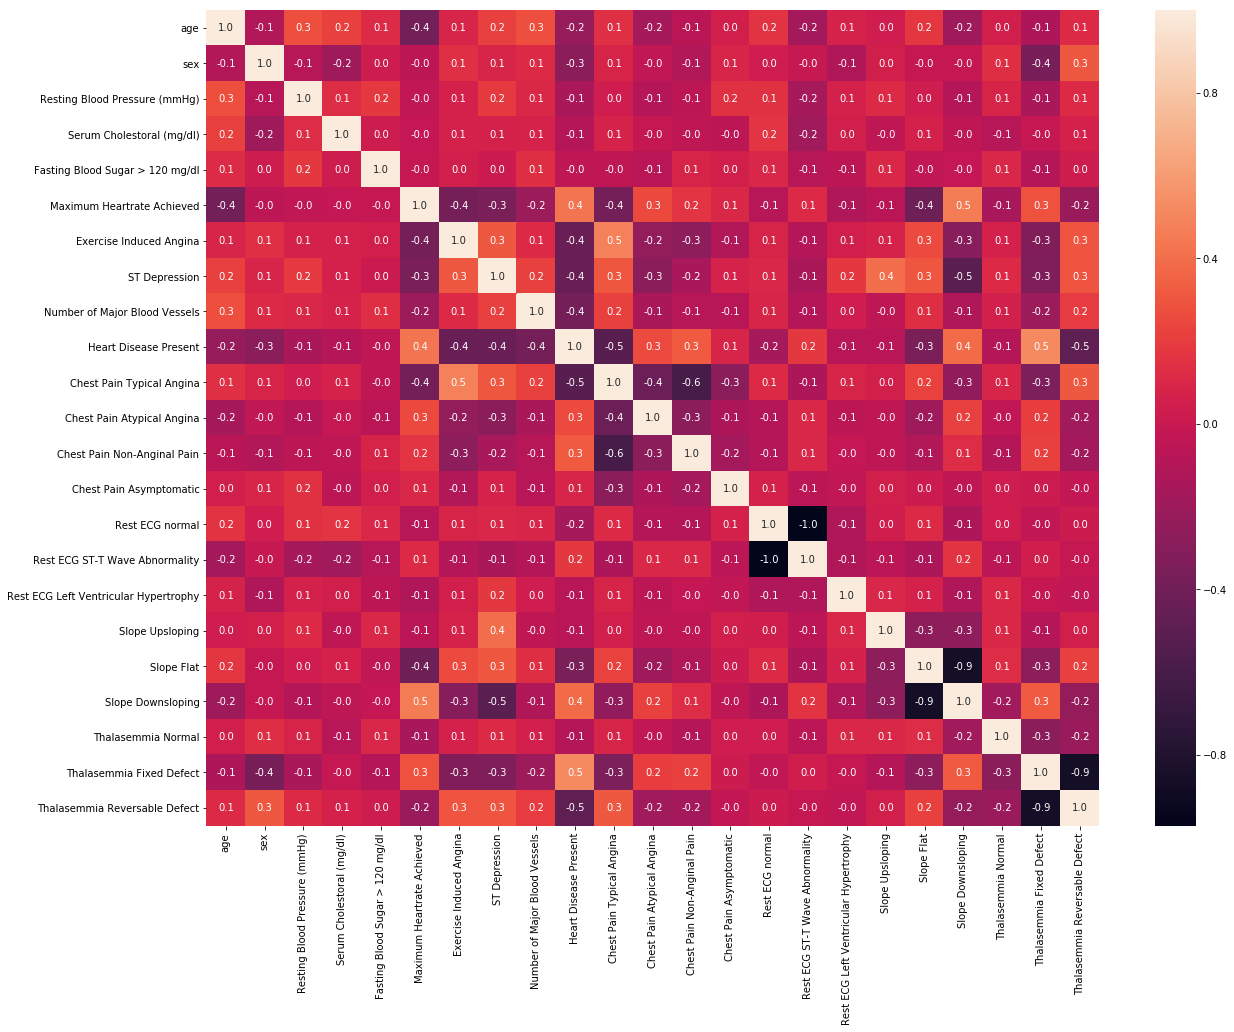

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 15))
sns.heatmap(heart.corr(), annot = True, fmt = '.1f')
plt.show()

#### Pairplot for continuous variables, which may not be that useful

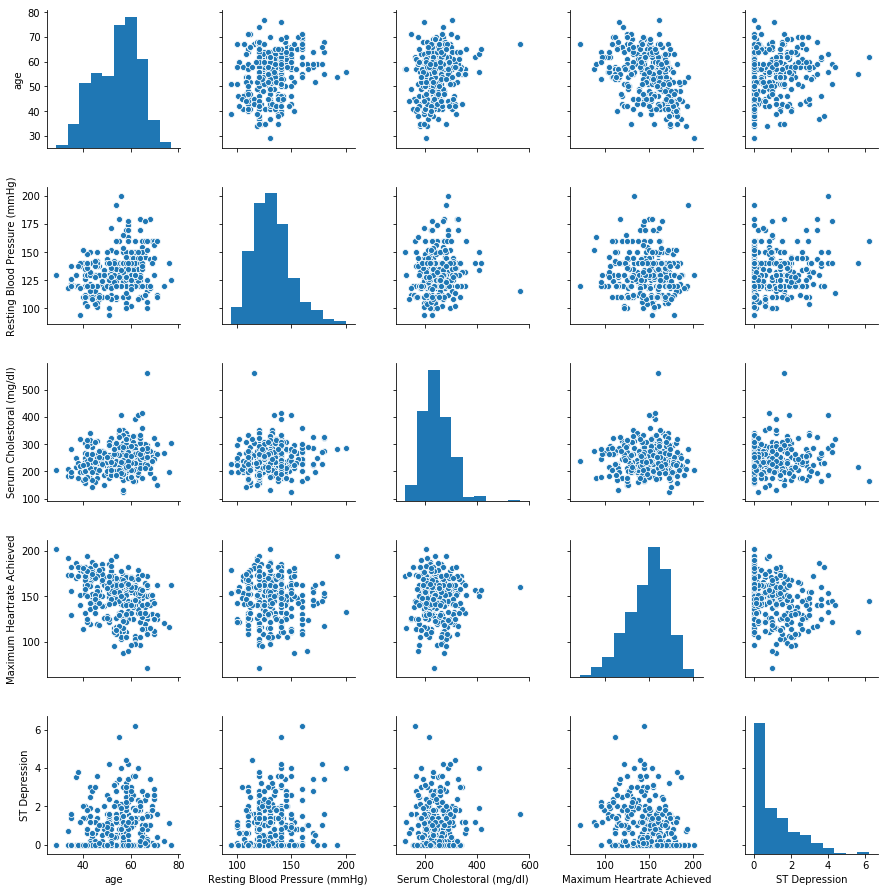

In [241]:
continuousVariables = ['age', 'Resting Blood Pressure (mmHg)', 'Serum Cholestoral (mg/dl)', 
                       'Maximum Heartrate Achieved', 'ST Depression']

sns.pairplot(heart[continuousVariables])

#### Age and Sex

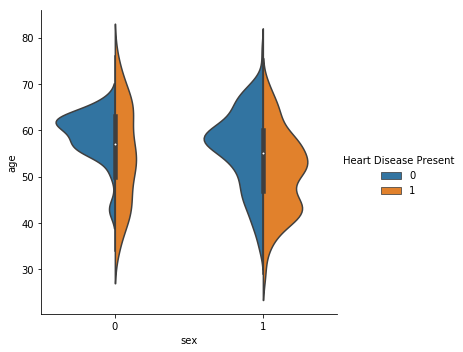

In [8]:
sns.catplot(x = 'sex', y = 'age', hue = 'Heart Disease Present', data = heart, kind = 'violin', split = True)

We see that the distribution of patients that have heart disease is much flatter. Let's look at this further.

#### Just Sex

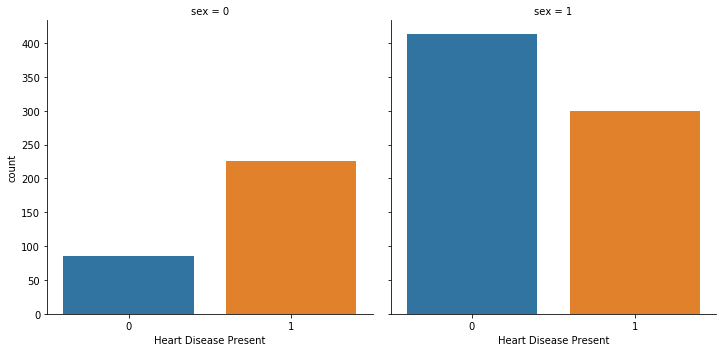

In [10]:
sns.catplot('Heart Disease Present', col = 'sex', kind = 'count', data = heart)

It appears that females are more likely to have heart disease! However, this could be due to other factors, as it appears that they are probably less likely to have heart disease, and in fact, men are more likely to die by heart disease ([source](https://www.kff.org/other/state-indicator/heart-disease-death-rate-by-gender/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)).

How many males, how many females?

In [238]:
nMales = np.sum(heart['sex'] == 1)
nFemales = len(heart) - nMales

print("Number of males: ", nMales)
print("Number of females: ", nFemales)

Number of males:  713
Number of females:  312


There are less than half as many females in this study, which may play a part in this finding.

#### Just Age

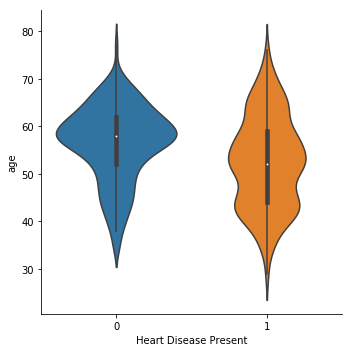

In [12]:
sns.catplot(x = 'Heart Disease Present', y = 'age', kind = 'violin', data = heart)

The results of violin plot seems to indicate that younger people are more likely to have heart disease. This does not agree with larger datasets ([source](https://www.heart.org/idc/groups/heart-public/@wcm/@sop/@smd/documents/downloadable/ucm_449846.pdf), and I would suggest that there are other factors at play here. 

#### Resting Blood Pressure

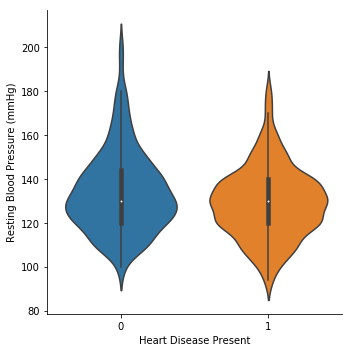

In [13]:
sns.catplot(x = 'Heart Disease Present', y = 'Resting Blood Pressure (mmHg)', kind = 'violin', data = heart)

Blood pressure does not seem to correlate with heart disease here

#### Cholesterol

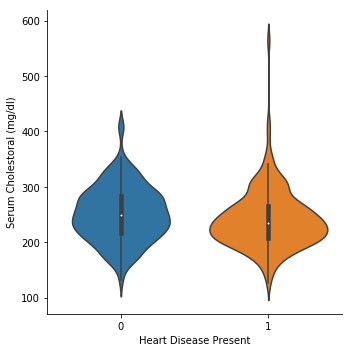

In [14]:
sns.catplot(x = 'Heart Disease Present', y = 'Serum Cholestoral (mg/dl)', kind = 'violin', data = heart)

Cholesterol levels does not seem to correlate with heart disease here

#### Fasting Blood Sugar

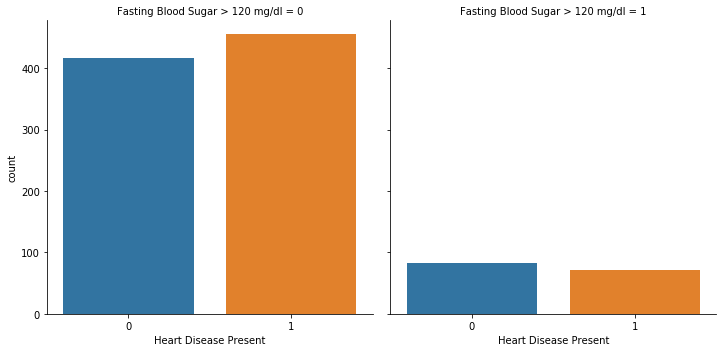

In [242]:
sns.catplot('Heart Disease Present', col = 'Fasting Blood Sugar > 120 mg/dl', data = heart, kind = 'count')

Blood sugar does not seem to correlate with heart disease here

#### Maximum Heart Rate Achieved

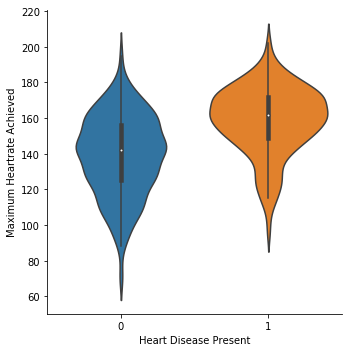

In [16]:
sns.catplot(x = 'Heart Disease Present', y = 'Maximum Heartrate Achieved', kind = 'violin', data = heart)

It appears those that reached their maximum heart rate during exercise were more likely to have heart disease. 

#### Exercise Induced Angina

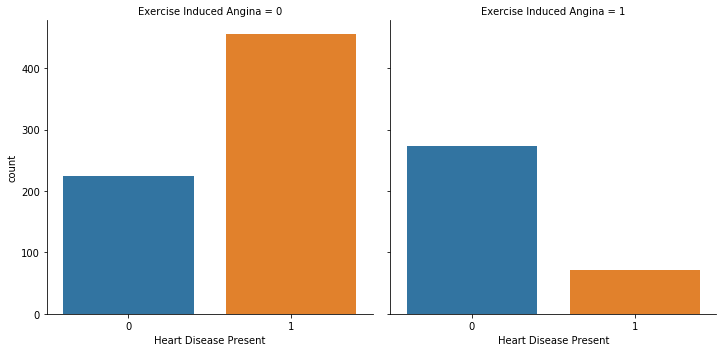

In [17]:
sns.catplot('Heart Disease Present', col = 'Exercise Induced Angina', kind = 'count', data = heart)

It seems those that experienced chest pain as a result of exercise were less likely to have heart disease.

#### ST Depression

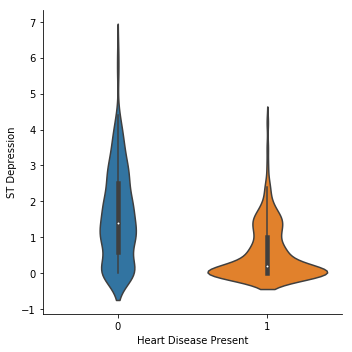

In [243]:
sns.catplot(x = 'Heart Disease Present', y = 'ST Depression', kind = 'violin', data = heart)

Appears that those with heart disease were likely to not have exercised induced ST depression

#### Number of Major Blood Vessels

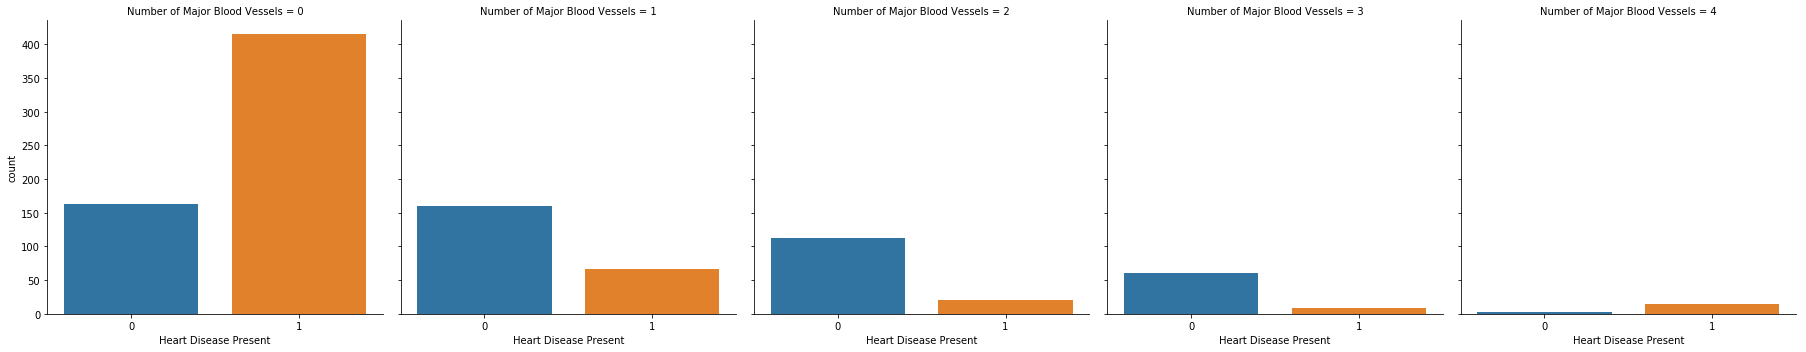

In [244]:
sns.catplot('Heart Disease Present', col = 'Number of Major Blood Vessels', data = heart, kind = 'count')

The less major blood vessels available, the higher chance the person has heart disease.

#### Chest Pain

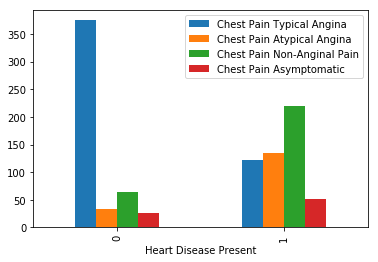

In [20]:
heart.groupby('Heart Disease Present').sum()[[column for column in heart.columns if 'Chest Pain' in column]].plot.bar()

Those with typical chest pain were less likely to have heart disease, with the other types of chest pain likely occuring with those with heart disease.

#### Resting Electrocardiogram

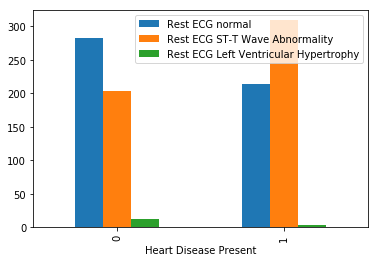

In [21]:
heart.groupby('Heart Disease Present').sum()[[column for column in heart.columns if 'ECG' in column]].plot.bar()

Normal ECG slightly more prevalent in those with no heart disease, and ST-T wave abnormality more prevalent in those with heart disease.

##### Just Left Ventricular Hypertrophy

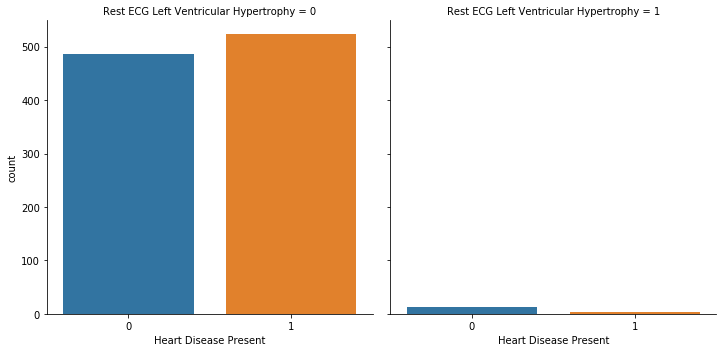

In [225]:
sns.catplot('Heart Disease Present', col = 'Rest ECG Left Ventricular Hypertrophy', kind = 'count', data = heart)

Doest not seem that left ventricular hypertrophy plays a part in heart disease.

#### Slope

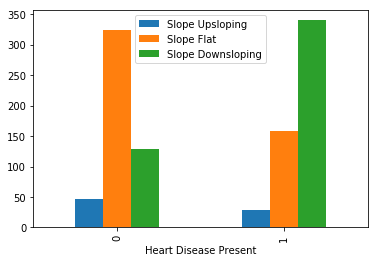

In [23]:
heart.groupby('Heart Disease Present').sum()[[column for column in heart.columns if 'Slope' in column]].plot.bar()

Downsloping seems to be correlated to heart disease, and a flat slope seems to be correlated to no heart disease.

#### Thalasemmia

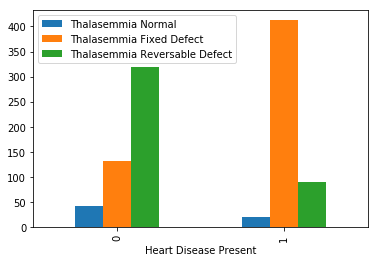

In [226]:
heart.groupby('Heart Disease Present').sum()[[column for column in heart.columns if 'Thalasemmia' in column]].plot.bar()

Reversable defect more prevalent in those with no heart disease, and a fixed defect in those with heart disease.

***

<a id='classification'></a>
## Classification

# Still Under Construction

In [282]:
import numpy as np 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

import statsmodels.discrete.discrete_model as sm

### Split into train and test data

In [283]:
target_column = ['Heart Disease Present']
feature_columns = [column for column in heart.columns if column not in target_column]

x = heart[feature_columns].values
y = heart[target_column].values.ravel()

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

### Perform normalization

Normalization is necessary for kNN.

In [302]:
# https://en.wikipedia.org/wiki/Normalization_(statistics)
class Normalize:
    
    def __init__(self, minimum = 0, maximum = 1):
        self.min = minimum
        self.max = maximum
        
    def fit(self, X):
        self.minX = np.min(X, axis = 0)
        self.maxX = np.max(X, axis = 0)
        
    def transform(self, X):
        return self.min + (X - self.minX) * ((self.max - self.min) / (self.maxX - self.minX))

In [303]:
scaler = Normalize()
scaler.fit(x_train)

x_train_scaled, x_test_scaled = map(scaler.transform, [x_train, x_test])

In [304]:
class myKNeighborsClassifier:
    
    def __init__(self, n_neighbors = 5, weights = 'uniform'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        
    def fit(self, features, targets):
        self.features = features
        self.targets = targets
        
    def predict(self, x):
        
        if x.ndim == 1:
            x = x.reshape(1, -1)
        
        if self.weights == 'uniform':
            f = self._uniform
        elif self.weights == 'distance':
            f = self._distance
        else:
            raise ValueError("Weights must be either 'uniform' or 'distance'")
        
        pred_targets = np.zeros(len(x)).astype(int)
        for i, x_ in enumerate(x):
            pred_targets[i] = self._predict(x_, f)
            
        return pred_targets
    
    def _predict(self, x, f):
        
        distances = np.linalg.norm(self.features - x, axis = 1)
        
        kNearestInd = np.argsort(distances)[:self.n_neighbors]
        
        return f(kNearestInd, distances)
        
    def _uniform(self, kNearestInd, distances):
        return self._mode(self.targets[kNearestInd])
    
    def _mode(self, y):
        uniqueValues, uniqueCounts = np.unique(y, return_counts = True)

        return uniqueValues[np.argmax(uniqueCounts)]
    
    def _distance(self, kNearestInd, distances):
        
        valMap = {}

        for val, distance in zip(self.targets[kNearestInd], distances[kNearestInd]):
            if val not in valMap:
                valMap[val] = 0
            valMap[val] += (1 / distance if distance != 0 else 1 / 1e-4)
            
        return max(valMap, key = valMap.get)

In [305]:
knn1 = myKNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn2 = myKNeighborsClassifier(n_neighbors = 3, weights = 'uniform')

knn1.fit(x_train_scaled, y_train)
knn2.fit(x_train_scaled, y_train)

In [306]:
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

y_pred1 = knn1.predict(x_test_scaled)
y_pred2 = knn2.predict(x_test_scaled)

print(accuracy_score(y_test, y_pred1))
print(accuracy_score(y_test, y_pred2))

0.9883268482490273
0.9416342412451362


In [307]:
results = sm.Logit(y_train, x_train_scaled).fit()

Optimization terminated successfully.
         Current function value: 0.329054
         Iterations 7


In [308]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  768
Model:                          Logit   Df Residuals:                      748
Method:                           MLE   Df Model:                           19
Date:                Tue, 23 Jul 2019   Pseudo R-squ.:                  0.5247
Time:                        21:50:15   Log-Likelihood:                -252.71
converged:                       True   LL-Null:                       -531.67
                                        LLR p-value:                3.753e-106
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5149      0.714     -0.721      0.471      -1.914       0.885
x2            -1.7614      0.339     -5.202      0.000      -2.425      -1.098
x3            -1.2476      0.715     -1.744      0.081      -2.650       0.155
x4            -3.4606      1.179     -2.934      0.003      -5.772      -1.149
x5             0.3909      0.356      1.099      0.272      -0.306       1.088
x6             2.1974      0.898      2.448      0.014       0.438       3.957
x7            -0.7529      0.278     -2.711      0.007      -1.297      -0.208
x8            -2.5626      0.861     -2.976      0.003      -4.251      -0.875
x9            -3.2857      0.503     -6.538      0.000      -4.271      -2.301
x10           -0.8438        nan        nan        nan         nan         nan
x11            0.1438        nan        nan        nan         nan         nan
x12            0.9545        nan        nan        nan         nan         nan
x13            0.9254        nan        nan        nan         nan         nan
x14            0.6184        nan        nan        nan         nan         nan
x15            1.1998        nan        nan        nan         nan         nan
x16            0.0595        nan        nan        nan         nan         nan
x17            0.5029        nan        nan        nan         nan         nan
x18            0.0739        nan        nan        nan         nan         nan
x19            1.0019        nan        nan        nan         nan         nan
x20            2.1317      1.594      1.338      0.181      -0.992       5.255
x21            1.9861      1.544      1.286      0.198      -1.040       5.013
x22            0.6232      1.549      0.402      0.687      -2.412       3.658
==============================================================================
"""

In [309]:
y_pred = np.array([1 if y_ >= 0.5 else 0 for y_ in results.predict(x_test_scaled)])

In [310]:
accuracy_score(y_test, y_pred)

0.8404669260700389

In [311]:
gb = GradientBoostingClassifier(max_depth=10, n_estimators=100)
gb.fit(x_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [312]:
y_pred = gb.predict(x_test_scaled)

In [313]:
accuracy_score(y_test, y_pred)

1.0

In [318]:
target_column = ['Heart Disease Present']
feature_columns = [column for column in heart.columns if column not in target_column]

x = heart[feature_columns].values
y = heart[target_column].values.ravel()

print("Feature array shape:", x.shape)
print("Target array shape:", y.shape)

n_splits = 10
random_state = 5
kf = KFold(n_splits=n_splits, random_state=random_state)

print("K-Fold Accuracies for k = %s" % n_splits)

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = StandardScaler()
    scaler.fit(x_train)
    
    x_train, x_test = scaler.transform(x_train), scaler.transform(x_test)
    
    model = KNeighborsClassifier(n_neighbors=2, weights='distance')
    #model = GradientBoostingClassifier(max_depth=5, n_estimators=100)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Feature array shape: (1025, 22)
Target array shape: (1025,)
K-Fold Accuracies for k = 10
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 97.09%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 97.06%
Accuracy: 100.00%
